# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

My additions to the concept check list:

* PDF: Probability Density Function
    histogram of probabilities. area under curve = 1, encompasses all possible outcomes. bell curve when normal dististribution

* CDF: Cumulative Distribution Function
    like PDF but cumulative as moves along x axis, rising as moves right. Reaches height of one at rightmost point, encompassing all values.  
    
* PPF:Percent Point Function
    Had to look this up, input:probability value between 0 and 1. Outputs z score such that area under standard normal distribution to left of z-score is equal to given probability. Need to understand better what this means and how it applies to hypothesis testing/
    
* t distribution
* Critical t-value
* percent vs. percentiile
* margin of error
* standard error
* confidence interval


In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipy
from scipy.stats import t
from numpy.random import seed
import seaborn as sns
medical = pd.read_csv('insurance2.csv')

In [293]:
medical.shape

(1338, 8)

In [294]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__The mean is 13270.42 and the standard deviation is 12110.01. These do not seem to be appropriate statistics. This is probably due to the the long right tail. Some medical charges are very high, skewing the mean and standard deviation. 

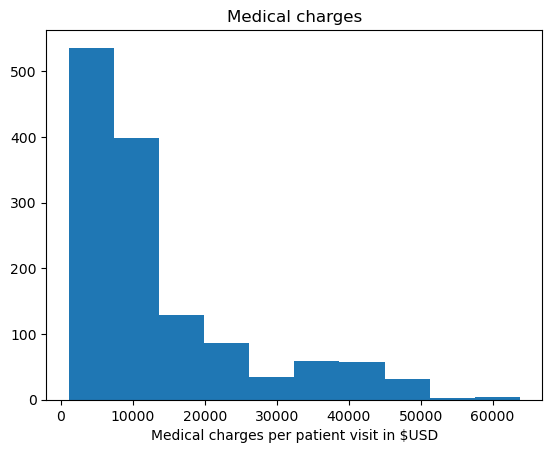

In [295]:
charges_data = medical["charges"]
plt.hist(charges_data)
plt.title("Medical charges")
plt.xlabel("Medical charges per patient visit in $USD");

In [296]:
sample_mean = np.mean(charges_data)
sample_mean

13270.422265141257

In [297]:
sample_std = np.std(charges_data, ddof = 1)
sample_std

12110.011236693994

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__Examining the t statistic may be a good approach as the sample data has heavy right tail. Also supporting the use of the t statistic is that the the population standard deviation is not known. 

I would reassure the administrator that the sample size (1,338) is adequate. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__A one-sided lower interval is appropriate, as we are concerned with whether, and by how much, the mean has dropped beyond a 1200o threshhold.  
The critical t value is -1.6459941145571324
The lower bound of the confidence interval is 13815.357346466282
As the lower bound of the 95% confidence interval is to the right of 1,200, with no overlap, it is unlikely that the mean charge has fallen below 1,200, which was the administrators concern. The administrator should be reassured by this information. 

In [298]:
n = 1338
percentile = 0.05
critical_t_value = t.ppf(percentile, n-1)
critical_t_value

-1.6459941145571324

In [299]:
margin_of_error = critical_t_value*standard_error
lower_confidence_bound = sample_mean - margin_of_error
lower_confidence_bound

13815.357346466282

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 
What assumption about the variances of the two groups are we making here?

__A4:__Null hypothesis: People are charged the same, whether they do or do not have insurance.
Alternative hypothesis: People with insurance are charged a different amount from people wihout insurance. The assumption we're making is that the respective variance of the two groups are similar enough to be treated as equal. I do find this strange though, as the caculated variance values for each group are 13677844.93 and 54093558.17 respectively. Assuming that they are equal seems quite a stretch. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [300]:
uninsured = medical[medical["insuranceclaim"] == 0].values
insured = medical[medical["insuranceclaim"] == 1].values

In [301]:
medical["insurance_status"] = np.where(medical["insuranceclaim"] ==0, "uninsured", "insured")
insurance_status = medical["insurance_status"]

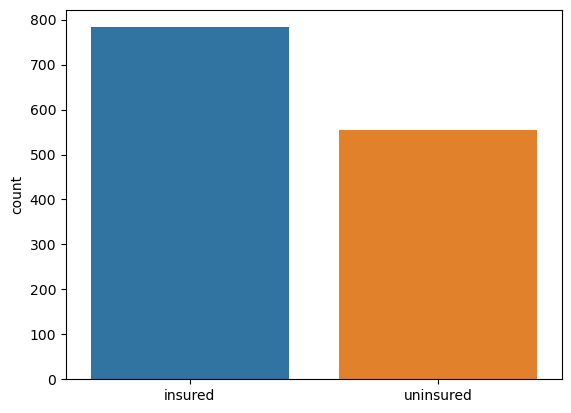

In [302]:
sns.countplot(x = medical["insurance_status"]);
plt.xlabel("");

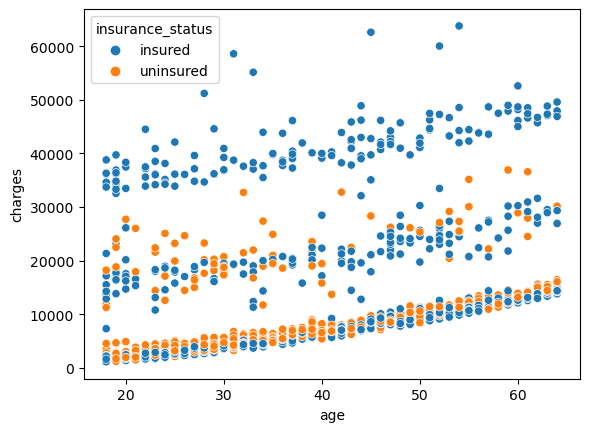

In [313]:
sns.scatterplot(x = medical["age"], y = charges_data, hue = insurance_status);

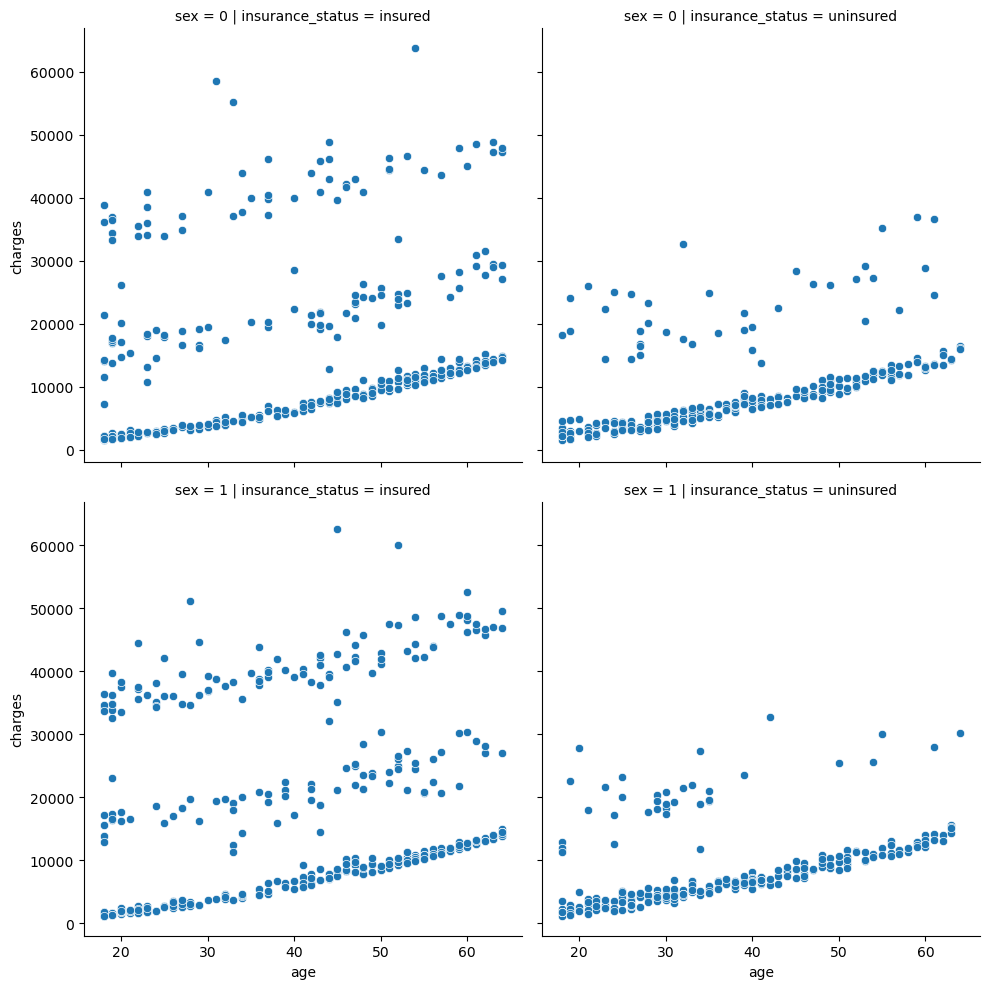

In [304]:
sns.relplot(x = medical["age"], y = charges_data, kind = "scatter", col = insurance_status, row = medical["sex"]);

In [305]:
n_0 = len(uninsured)
df_0 = n_0 -1
std_0 = np.std(uninsured)
var_0 = (n_0_std)**2
mean_0 = np.mean(uninsured)

n_1 = len(insured)
df_1 = n_1 -1
std_1 = np.std(insured)
var_1 = (n_1_std)**2
mean_1 = np.mean(insured)

In [308]:
pooled_std = np.sqrt(((df_0*var_0)+(df_1*var_1))/(df_0+df_1))
pooled_std

6110.183936998563

In [309]:
t = (mean_0 - mean_1)/(pooled_std*np.sqrt((1/n_0) + (1/n_1)))
t

-2.8060042219870303

In [311]:
scipy.stats.ttest_ind_from_stats?

In [312]:
scipy.stats.ttest_ind_from_stats(mean_0, std_0, n_0, mean_1, std_1, n_1, equal_var = True, alternative = 'two-sided')

Ttest_indResult(statistic=-2.8060042219870307, pvalue=0.005088785740051193)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__You would just use the z test as you would already know the population standard deviation and have a sample size large enough to assume the that the sampling distribution of the mean is normal. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test